#  <center> Data Science 100 Group Project <center>
## <center> Predicting Degree of Heart Disease Presence <center>

### PROJECT PROPOSAL

Saige Hickey 86052669 \
Amanda Lindsey 26499640 \
Kylee Dyck 78242021 \
Chengwei Zhu 17055666 


#### Introduction:
For our group project, we chose to use the Heart Disease data, specifically the processed Cleveland dataset (processed.cleveland.data). The term ‘heart disease’ encompasses various different conditions an individual can experience. The data table is populated with some of these variables related to or contributing to heart disease, including age, number of cigarettes per day, resting blood pressure, and cholesterol level. The processed data used for this analysis is from patients in Cleveland who experienced varying types and degrees of chest pain or angina. The question we are hoping to answer is whether we can confidently predict whether an individual has a heart disease based on four numerical predictors found in this dataset. Ultimately, using the variables cholesterol, age, resting blood pressure, and maximum heart rate achieved, we will create a predictor for the presence/absence of heart disease.

#### Methods:
We will be using the variables age, resting blood pressure (trestbps), maximum heart rate achieved (thalach) and cholesterol levels (chol) to conduct our analysis. Initially, the data will be filtered to remove all other columns that do not contribute to the predictory question. Next, we will randomly split our data into training and testing data. We will then use knn classification to predict the presence or absence of heart disease in patients in the testing data. We will test several values for k using the training data. Finally, we will assess the performance of the classification using cross-validation on the training data to determine the optimal value of k for our data. Using a scatter plot, we will visualize the relationships in the data and use aesthetics such as color and shape to differentiate variables. One example of a visualization we use to communicate the results is side-by-side scatter plots of the testing data showing two of the predictive variables, such as cholesterol and age, coloured by presence/absence of heart disease. The two plots will have the same axis, except one plot will have the actual presence/absence of heart disease data, while the other will have the predicted presence/absence data from the model. This way, the viewer can see how closely the plots match and have a visual representation of the predictor’s performance. 

#### Expected outcomes and significance:
We expect higher levels of cholesterol, resting blood pressure, maximum heart rate achieved, and age will correspond to a stronger presence of heart disease. Our findings could impact the awareness of the risks of heart disease based on these four criteria. If people have greater awareness of their innate risk for heart disease, they can take preventive actions to lessen their risk. Studies such as this one can also prompt further analysis to explore and determine what other factors can make a person more susceptible to a heart disease and what measures can people take to avoid heart disease. A potential new question this study might lead to is: do any of these factors interact synergistically? 



In [66]:
## load packages
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

In [67]:
## read data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
## Filter data and select data so there's no N/A observations in the predictor variables
heart_disease_data <- filter(heart_disease_data, age != "?", chol != "?", trestbps != "?",  thalach != "?", num != "?") |>
    select(age, chol, trestbps, thalach, num) |>
    mutate(degree_presence = case_when(num == 0 ~ "absence",
                                num == 1 ~ "small presence",
                                num == 2 ~ "presence",
                                num == 3 ~ "strong presence",
                                num == 4 ~ "strongest presence")) |>
    mutate(degree_presence = as.factor(degree_presence))

## specify levels of factor column
disease_factored <- factor(c("absence", "small presence", "presence", "strong presence", "strongest presence"))
levels(heart_disease_data$degree_presence) <- disease_factored

heart_disease_data

age,chol,trestbps,thalach,num,degree_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,0,absence
67,286,160,108,2,small presence
67,229,120,129,1,presence
37,250,130,187,0,absence
41,204,130,172,0,absence
56,236,120,178,0,absence
62,268,140,160,3,strong presence
57,354,120,163,0,absence
63,254,130,147,2,small presence


[1] "colour codes: "


[1] "#FFFF00" "#FFBF00" "#FF7F00" "#FF3F00" "#FF0000"

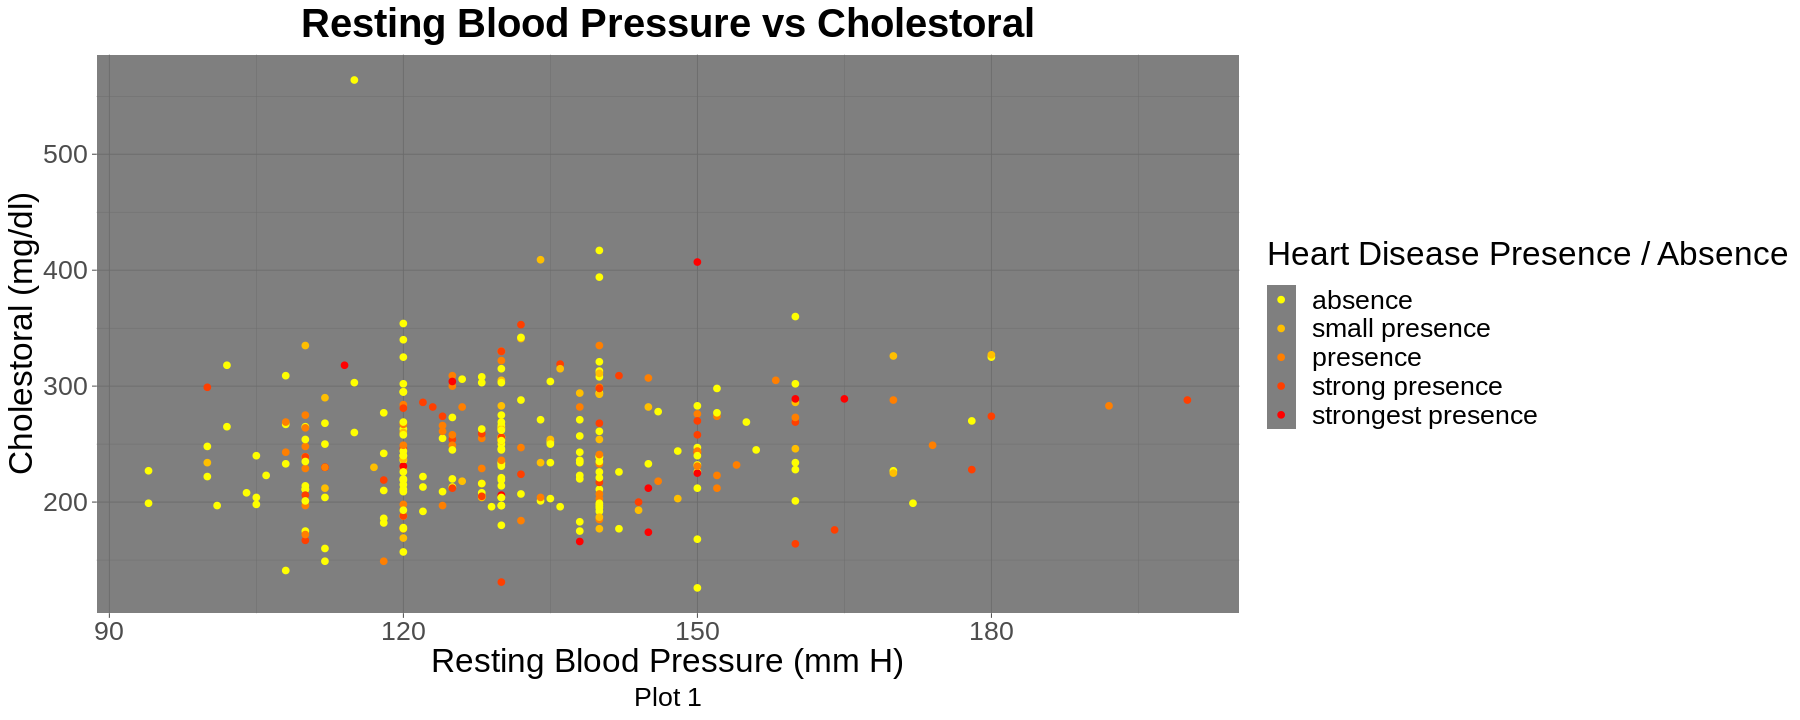

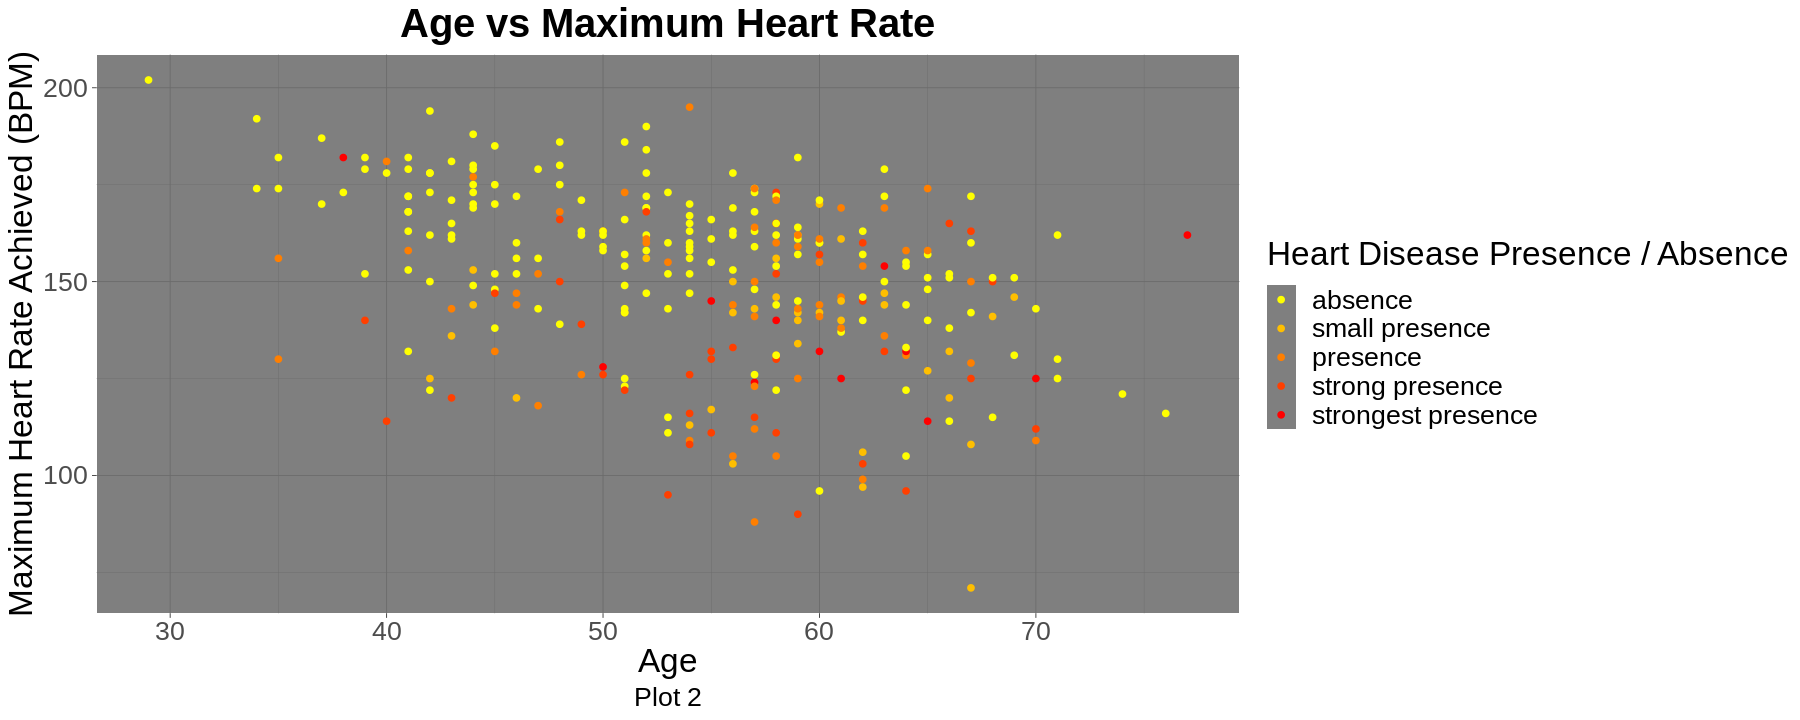

In [48]:
## plot
options(repr.plot.width=15, repr.plot.height=6)

## set colours
colfunc <- colorRampPalette(c("yellow", "red"))
print("colour codes: ") 
cols <- colfunc(5)
cols

colours <- c("absence" = cols[1], "small presence" = cols[2], "presence" = cols[3], "strong presence" = cols[4], "strongest presence" = cols[5])

## create plot with colour palette
heart_disease_data |>  
    ggplot(aes(x=trestbps, 
               y= chol, 
               colour = degree_presence)) +
    scale_color_manual(values = colours) +
        labs(x = "Resting Blood Pressure (mm H)",
             y = "Cholestoral (mg/dl)",
             title = "Resting Blood Pressure vs Cholestoral", 
            colour = 'Heart Disease Presence / Absence',
            caption = "Plot 1") +
        geom_point() +
        theme_dark() +
        theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption

heart_disease_data |>  
    ggplot(aes(x=age, 
               y=thalach, 
               colour = degree_presence)) +
    scale_color_manual(values = colours) +
        labs(x = "Age",
             y = "Maximum Heart Rate Achieved (BPM)",
             title = "Age vs Maximum Heart Rate", 
            colour = 'Heart Disease Presence / Absence',
            caption = "Plot 2") +
        geom_point() +
        theme_dark() +
        theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption



In [26]:
## Establish training and testing data sets
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = degree_presence)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)

In [25]:
## Preliminary exploratory data analysis
heart_disease_train_summary <- heart_disease_train |>
    group_by(degree_presence) |>
    summarize(degree_presence_count = n())

heart_disease_train_summary

degree_presence,degree_presence_count
<fct>,<int>
absence,124
small presence,27
presence,40
strong presence,25
strongest presence,9


In [97]:
## Cholestoral
train_chol <- heart_disease_train |>
    select(chol, degree_presence) 

In [101]:
## Absence
absence_chol <- train_chol |>
    filter(degree_presence == "absence") 

total_number_absence_chol <- nrow(absence_chol)

absence_high_chol <- absence_chol |>
    filter(chol >= 240)

number_absence_high_chol <- nrow(absence_high_chol)

percent_high_chol_absent = (number_absence_high_chol/total_number_absence_chol)*100

In [102]:
## Presence
presence_chol <- train_chol |>
    filter(degree_presence != "absence") 

total_number_presence_chol <- nrow(presence_chol)

presence_high_chol <- presence_chol |>
    filter(chol >= 240)

number_presence_high_chol <- nrow(presence_high_chol)

percent_high_chol_present = (number_presence_high_chol/total_number_presence_chol)*100

heart_disease,percent
<chr>,<dbl>
Absent,44.71545
Present,58.25243


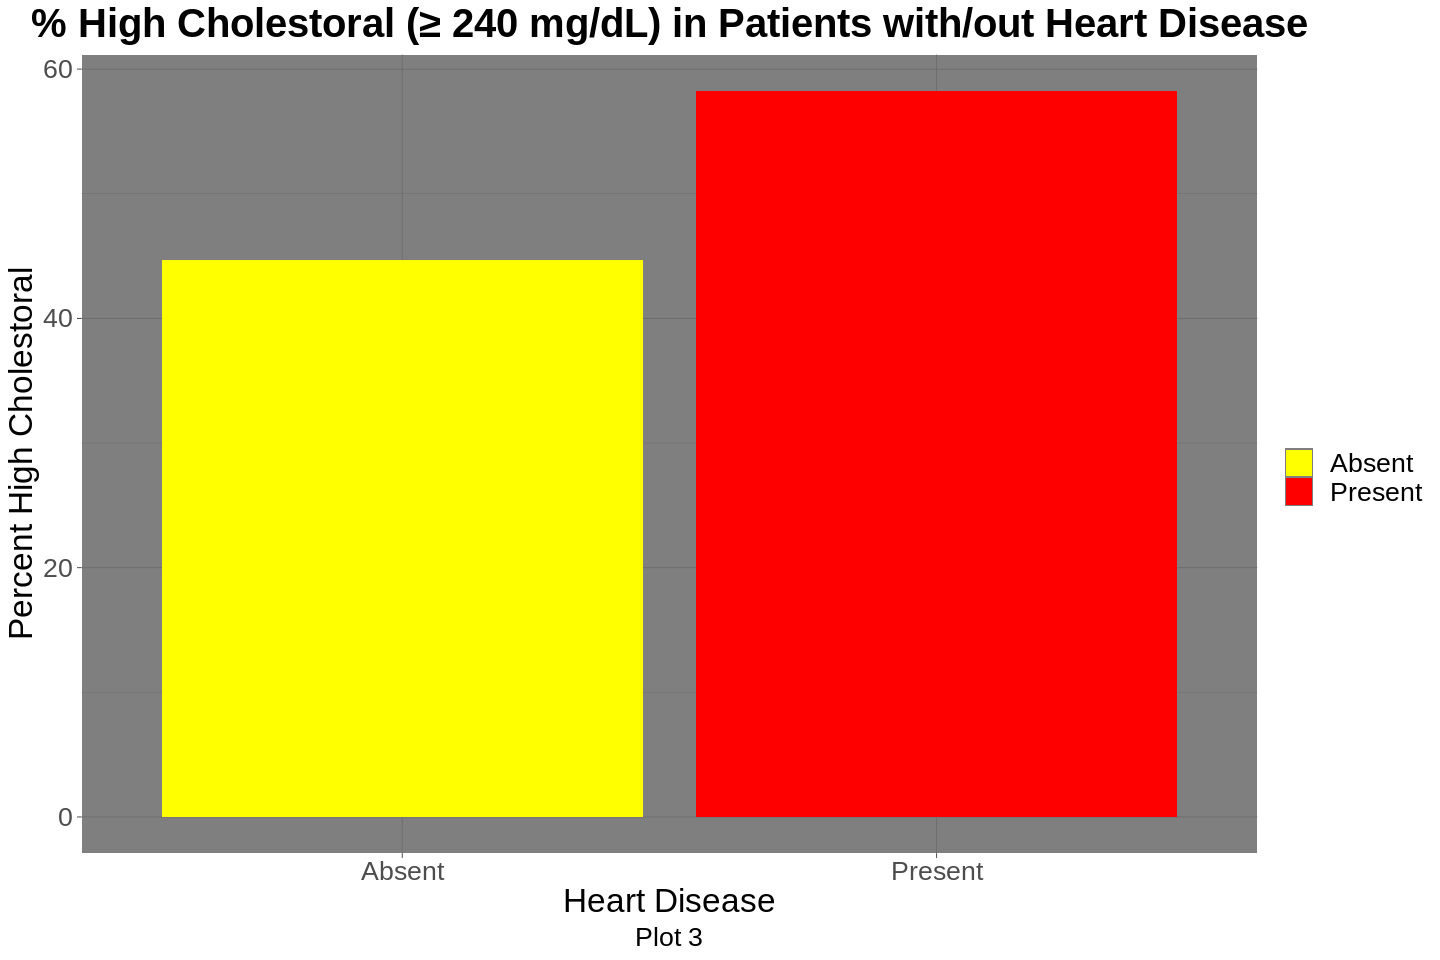

In [146]:
options(repr.plot.width=12, repr.plot.height=8)

percent_high_chol <- tibble(heart_disease = c("Absent", "Present"), percent = c(percent_high_chol_absent, percent_high_chol_present))
percent_high_chol

ggplot(percent_high_chol, aes(x=heart_disease, y=percent, fill=heart_disease)) +
  geom_bar(stat="identity") +
  theme_dark() +
  labs(x = "Heart Disease",
       y = "Percent High Cholestoral",
      title = "% High Cholestoral (≥ 240 mg/dL) in Patients with/out Heart Disease",
      caption = "Plot 3") +
      scale_fill_manual("", values = c("Absent" = "yellow", "Present" = "red")) +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


In [122]:
## Age
train_age <- heart_disease_train |>
    select(age, degree_presence) 

In [123]:
## Absence
absence_age <- train_age |>
    filter(degree_presence == "absence") 

total_number_absence_age <- nrow(absence_age)

absence_high_age <- absence_age |>
    filter(age >= 50)

number_absence_high_age <- nrow(absence_high_age)

percent_high_age_absent = (number_absence_high_age/total_number_absence_age)*100

In [155]:
## Presence
presence_age <- train_age |>
    filter(degree_presence != "absence") 

total_number_presence_age <- nrow(presence_age)

presence_high_age <- presence_age |>
    filter(age >= 50)

number_presence_high_age <- nrow(presence_high_age)

percent_high_age_present = (number_presence_high_age/total_number_presence_age)*100

heart_disease,percent
<chr>,<dbl>
Absent,64.22764
Present,79.61165


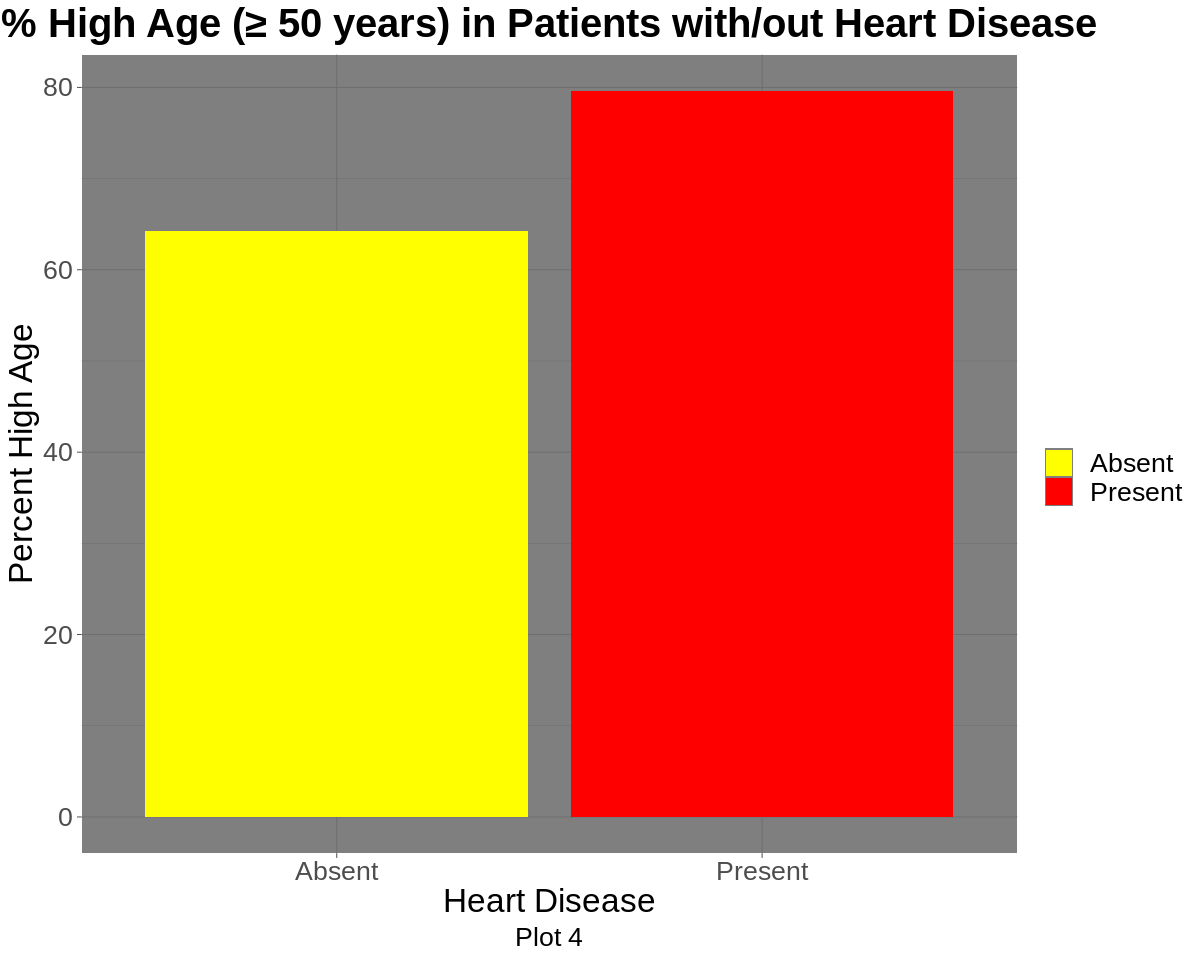

In [147]:
options(repr.plot.width=10, repr.plot.height=8)

percent_high_age <- tibble(heart_disease = c("Absent", "Present"), percent = c(percent_high_age_absent, percent_high_age_present))
percent_high_age

ggplot(percent_high_age, aes(x=heart_disease, y=percent, fill=heart_disease)) +
  geom_bar(stat="identity") +
  theme_dark() +
  labs(x = "Heart Disease",
       y = "Percent High Age",
      title = "% High Age (≥ 50 years) in Patients with/out Heart Disease",
      caption = "Plot 4") +
      scale_fill_manual("", values = c("Absent" = "yellow", "Present" = "red")) +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


In [135]:
## Resting Blood Pressure
train_bp <- heart_disease_train |>
    select(trestbps, degree_presence) 

In [136]:
## Absence
absence_bp <- train_bp |>
    filter(degree_presence == "absence") 

total_number_absence_bp <- nrow(absence_bp)

absence_high_bp <- absence_bp |>
    filter(trestbps >= 125)

number_absence_high_bp <- nrow(absence_high_bp)

percent_high_bp_absent = (number_absence_high_bp/total_number_absence_bp)*100

In [138]:
## Presence
presence_bp <- train_bp |>
    filter(degree_presence != "absence") 

total_number_presence_bp <- nrow(presence_bp)

presence_high_bp <- presence_bp |>
    filter(trestbps >= 125)

number_presence_high_bp <- nrow(presence_high_bp)

percent_high_bp_present = (number_presence_high_bp/total_number_presence_bp)*100

heart_disease,percent
<chr>,<dbl>
Absent,59.34959
Present,71.84466


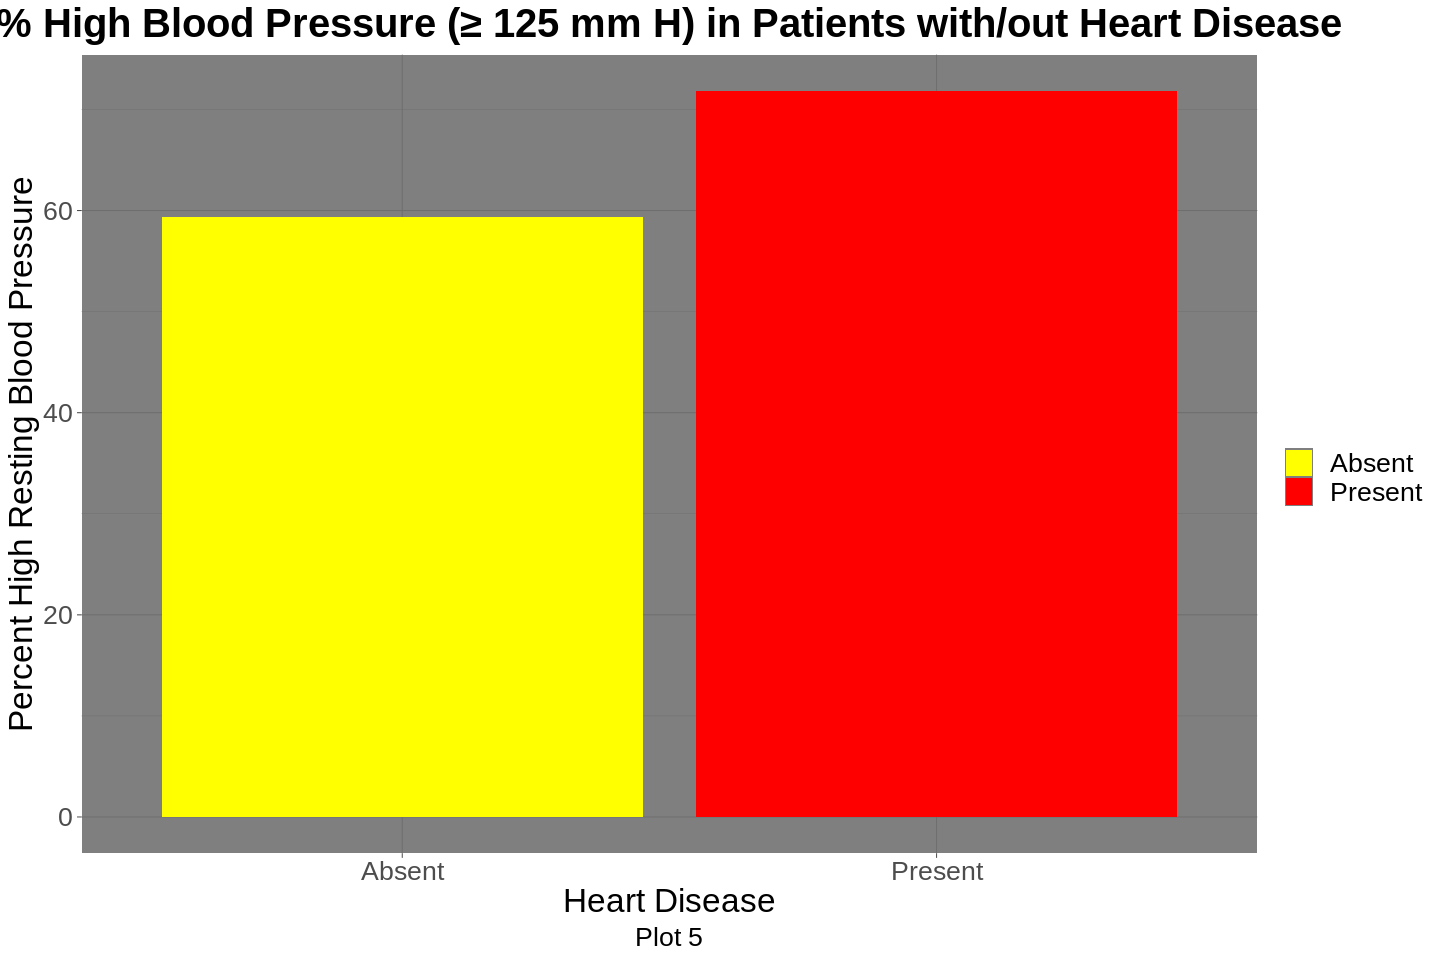

In [149]:
options(repr.plot.width=12, repr.plot.height=8)

percent_high_bp <- tibble(heart_disease = c("Absent", "Present"), percent = c(percent_high_bp_absent, percent_high_bp_present))
percent_high_bp

ggplot(percent_high_bp, aes(x=heart_disease, y=percent, fill=heart_disease)) +
  geom_bar(stat="identity") +
  theme_dark() +
  labs(x = "Heart Disease",
       y = "Percent High Resting Blood Pressure",
      title = "% High Blood Pressure (≥ 125 mm H) in Patients with/out Heart Disease",
      caption = "Plot 5") +
      scale_fill_manual("", values = c("Absent" = "yellow", "Present" = "red")) +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


In [150]:
## Maximum heart rate achieved (thalach)
train_hr <- heart_disease_train |>
    select(thalach, degree_presence) 

In [151]:
## Absence
absence_hr <- train_hr |>
    filter(degree_presence == "absence") 

total_number_absence_hr <- nrow(absence_hr)

absence_high_hr <- absence_hr |>
    filter(thalach >= 200)

number_absence_high_hr <- nrow(absence_high_hr)

percent_high_hr_absent = (number_absence_high_hr/total_number_absence_hr)*100

In [153]:
## Presence
presence_hr <- train_hr |>
    filter(degree_presence != "absence") 

total_number_presence_hr <- nrow(presence_hr)

presence_high_hr <- presence_hr |>
    filter(thalach >= 200)

number_presence_high_hr <- nrow(presence_high_hr)

percent_high_hr_present = (number_presence_high_hr/total_number_presence_hr)*100

heart_disease,percent
<chr>,<dbl>
Absent,0
Present,0


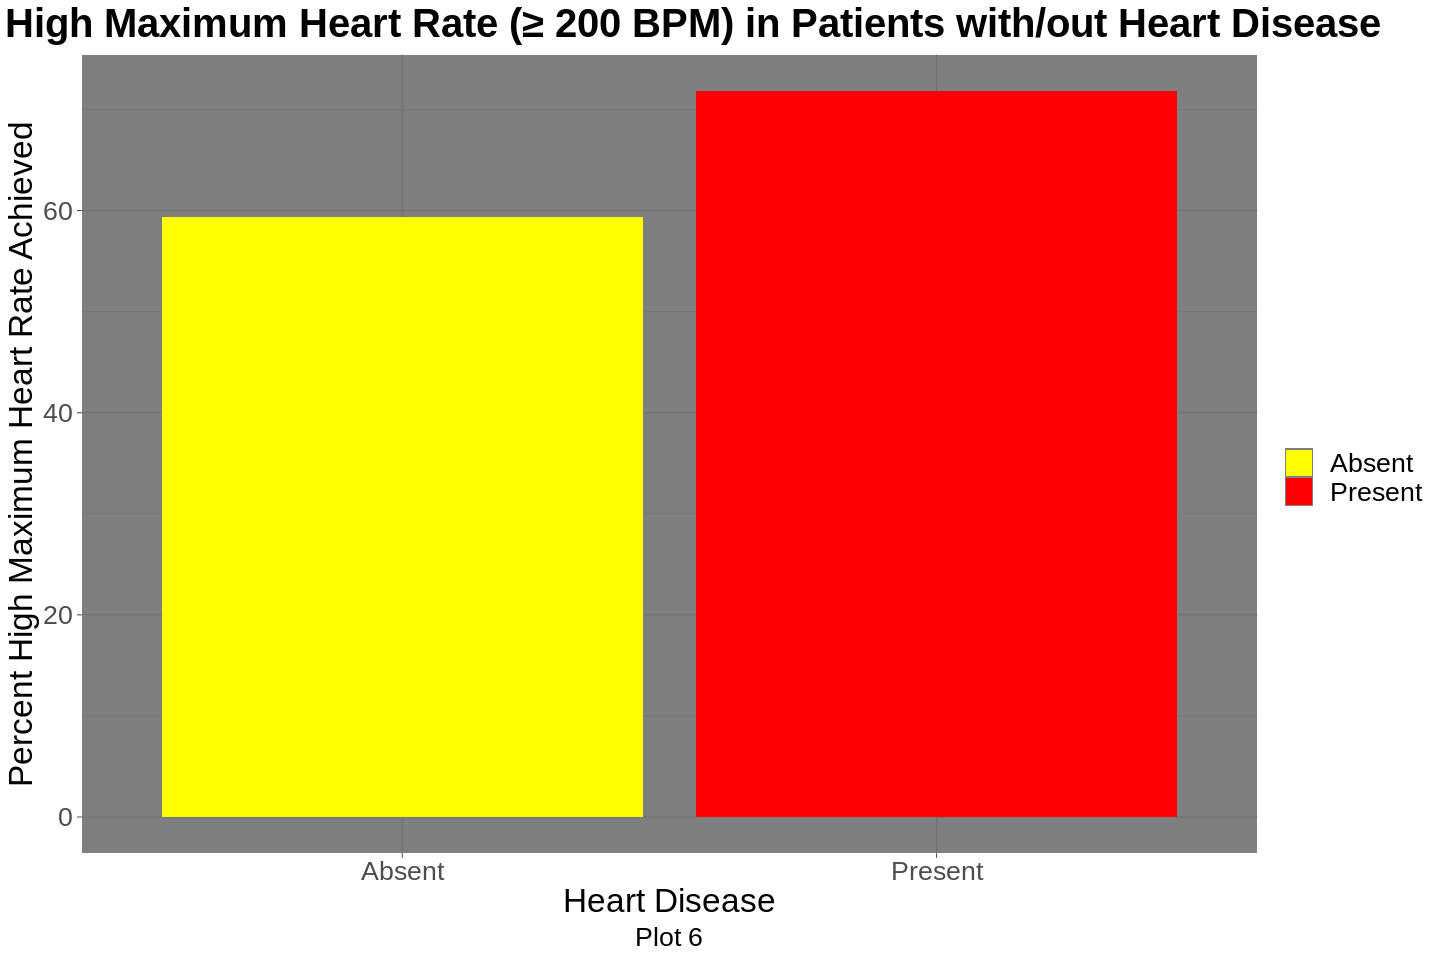

In [154]:
options(repr.plot.width=12, repr.plot.height=8)

percent_high_hr <- tibble(heart_disease = c("Absent", "Present"), percent = c(percent_high_hr_absent, percent_high_hr_present))
percent_high_hr

ggplot(percent_high_bp, aes(x=heart_disease, y=percent, fill=heart_disease)) +
  geom_bar(stat="identity") +
  theme_dark() +
  labs(x = "Heart Disease",
       y = "Percent High Maximum Heart Rate Achieved",
      title = "% High Maximum Heart Rate (≥ 200 BPM) in Patients with/out Heart Disease",
      caption = "Plot 6") +
      scale_fill_manual("", values = c("Absent" = "yellow", "Present" = "red")) +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


Our preliminary data analysis supports our initial hypothesis that higher levels of all 4 of our predictive variables (cholestoral, age, blood pressure, and max heart rate) is more prominant in patients with some degree of heart disease. 

*Disclaimer*: The threshholds chosen for "high" levels of our 4 predictors is somewhat arbitrary, but not inaccurate given research conducted.